# Diamond Price Prediction Model

## Project Overview

The Diamond Price Prediction project aims to build a machine learning model that accurately estimates the price of a diamond based on its attributes such as carat, cut, color, clarity, depth, and dimensions. The project will involve data collection, preprocessing, feature engineering, model training, and deployment through a Streamlit web application.

Link to Dataset: https://www.kaggle.com/datasets/willianoliveiragibin/type-of-the-diamond

## Importing Libraries

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm

import kagglehub
import os

from sklearn.preprocessing import OrdinalEncoder

## Data Ingestion

In [107]:
# Download latest version
path = kagglehub.dataset_download("willianoliveiragibin/type-of-the-diamond")

print("Path to dataset files:", path)

Path to dataset files: /Users/reema14a/.cache/kagglehub/datasets/willianoliveiragibin/type-of-the-diamond/versions/1


In [108]:
dataset = pd.read_csv(path + '/' + os.listdir(path)[0])

In [109]:
dataset.shape

(53940, 10)

In [110]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cut            53940 non-null  object 
 1   color          53940 non-null  object 
 2   clarity        53940 non-null  object 
 3   carat          53940 non-null  float64
 4   depth          53940 non-null  float64
 5   table          53940 non-null  float64
 6   price          53940 non-null  int64  
 7   x (Premium)    53940 non-null  float64
 8   z (Very Good)  53940 non-null  float64
 9   y (Good)       53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


*   **carat**: indicates the weight of the diamond 
*   **cut**: determines its shine with categories such as `ideal`, `premium`, `good`, `very good` and `fair`  
*   **color**: ranges from `D` to `J` affecting the visual appeal of the diamond 
*   **clarity**: describes the internal purity of the diamond with classifications like `SI2`, `SI1`, `VS1`, `VS2`, `VVS2`, `VVS1` and `I1` 
*   **depth**: represents the diamond’s depth percentage 
*   **table**: refers to the flat facet on its surface which is the large flat area visible from above 
*   **x**: denotes the width of the diamond 
*   **y**: denotes the length of the diamond 
*   **z**: denotes the height of the diamond 
*   **price**: indicates the cost of the diamond in USD

In [111]:
dataset.head(5)

,cut,color,clarity,carat,depth,table,price,x (Premium),z (Very Good),y (Good)
0,Fair,E,VS2,0.22,65.1,61.0,337,3.87,2.49,3.78
1,Fair,E,SI2,0.86,55.1,69.0,2757,6.45,3.52,6.33
2,Fair,F,SI2,0.96,66.3,62.0,2759,6.27,4.07,5.95
3,Fair,F,VS2,0.70,64.5,57.0,2762,5.57,3.58,5.53
4,Fair,F,VS2,0.70,65.3,55.0,2762,5.63,3.66,5.58


## EDA

In [112]:
# Check for null values
dataset.isnull().sum()

cut              0
color            0
clarity          0
carat            0
depth            0
table            0
price            0
x (Premium)      0
z (Very Good)    0
y (Good)         0
dtype: int64

***No null* values**

### Rename columns

In [113]:
dataset.rename(columns = {'x (Premium)': 'x',
                          'y (Good)': 'y',
                          'z (Very Good)': 'z'},
                inplace = True)

### Univariate Analysis

In [114]:
categorical_features = ['cut', 'color', 'clarity']
numerical_features = dataset.select_dtypes(include=[np.number]).columns 

In [115]:
for x in categorical_features:
    print('-----------------')
    print('\033[1m' + x + '\033[0m')
    print('-----------------')
    print(dataset[x].value_counts())

-----------------
cut
-----------------
cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64
-----------------
color
-----------------
color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64
-----------------
clarity
-----------------
clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64


In [116]:
sns.set_theme(context = 'paper', style = 'dark')
sns.set_palette('husl', 10)

### Price Distribution

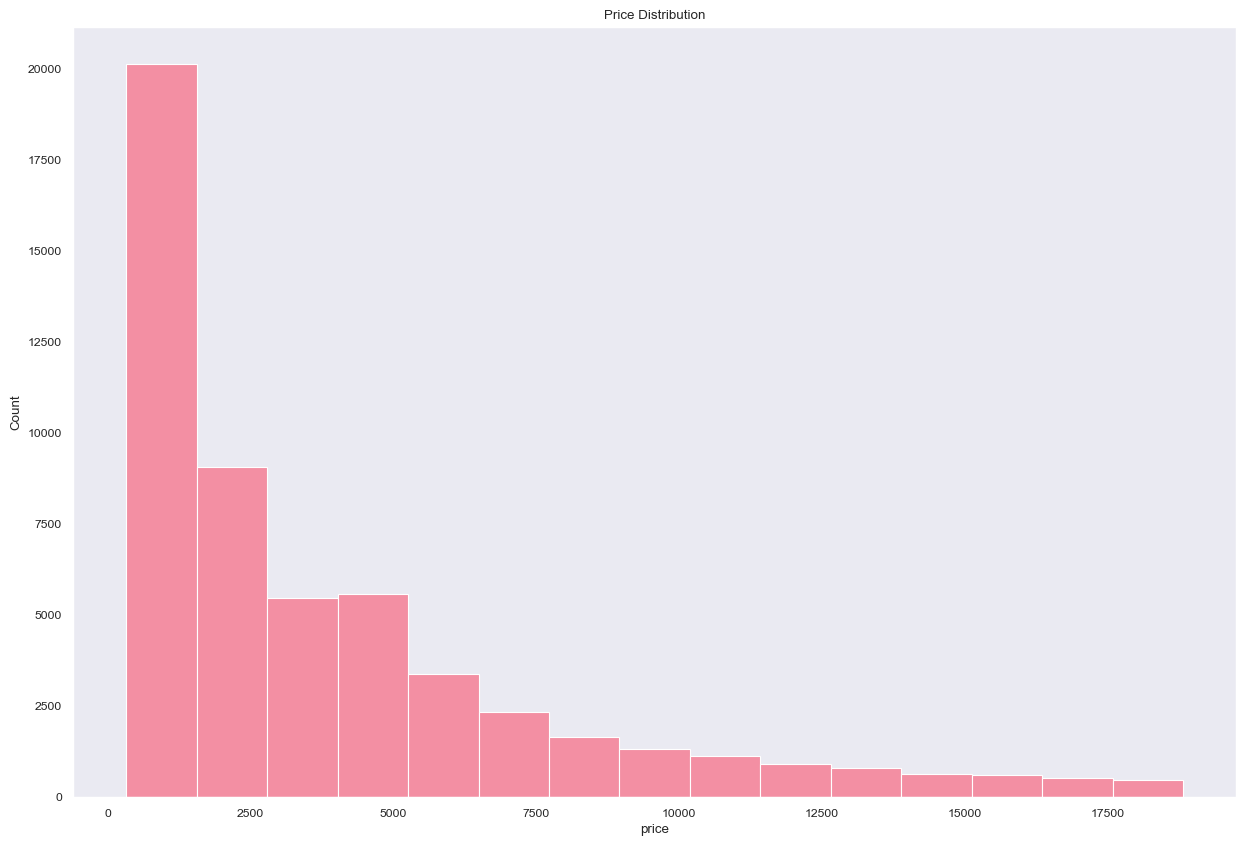

In [117]:
plt.figure(figsize=(15,10))
sns.histplot(data = dataset, x = 'price', bins = 15)
plt.title('Price Distribution')
plt.show()

### Distribution of Categorical Features

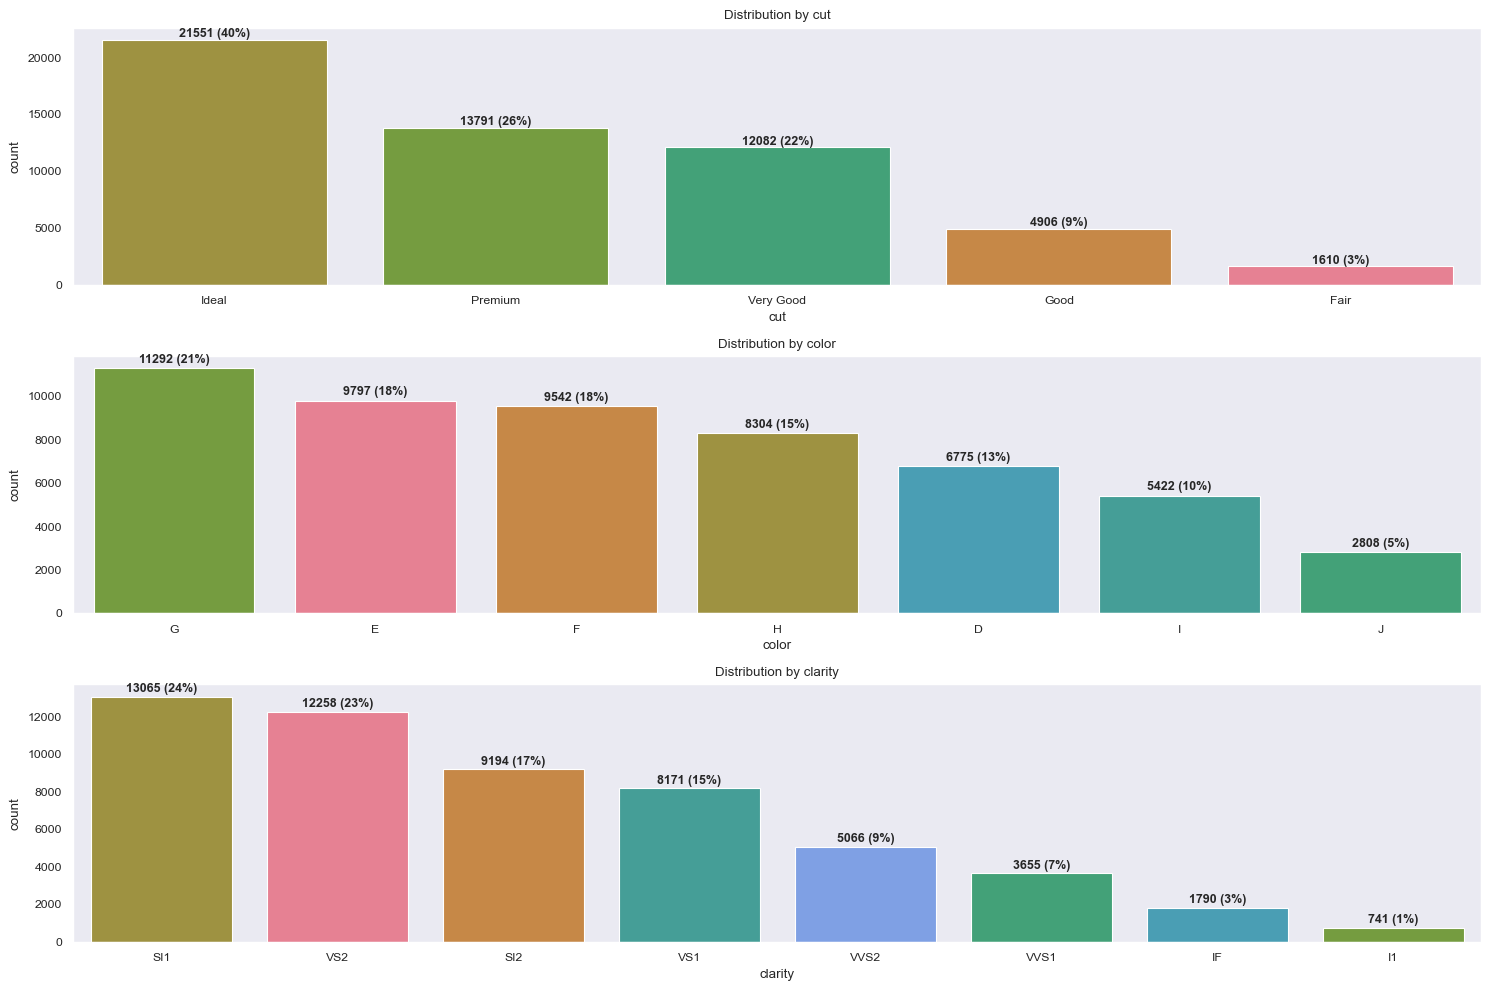

In [118]:
plt.figure(figsize=(15,10))

for index, feature in enumerate(categorical_features):
    abs_values = dataset[feature].value_counts(ascending=False)
    rel_values = dataset[feature].value_counts(ascending=False, normalize=True).values * 100
    lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]


    plt.subplot(3, 1, index + 1)
    ax = sns.countplot(data = dataset, 
                    x = feature, 
                    order=abs_values.index,
                    hue = feature, 
                    )

    # Extract bars in sorted order
    bars = sorted(ax.patches, key=lambda bar: bar.get_x())  # Sort bars by x-position

    # Annotate each bar with corresponding label
    for bar, lbl in zip(bars, lbls):  
        ax.text(bar.get_x() + bar.get_width()/2,  # X-coordinate (center of bar)
                bar.get_height() + 250,            # Y-coordinate (above bar)
                lbl,                              # Label text
                ha='center',                      # Center alignment
                fontsize=9, 
                fontweight='bold')
    
    plt.title('Distribution by ' + feature)
plt.tight_layout()
plt.show()

### Distribution of Numerical Features

In [119]:
dataset.describe()

,carat,depth,table,price,x,z,y
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,3.538734,5.734526
std,0.474011,1.432621,2.234491,3989.439738,1.121761,0.705699,1.142135
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,2.910000,4.720000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,3.530000,5.710000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,4.040000,6.540000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,31.800000,58.900000


### Bivariate Analysis

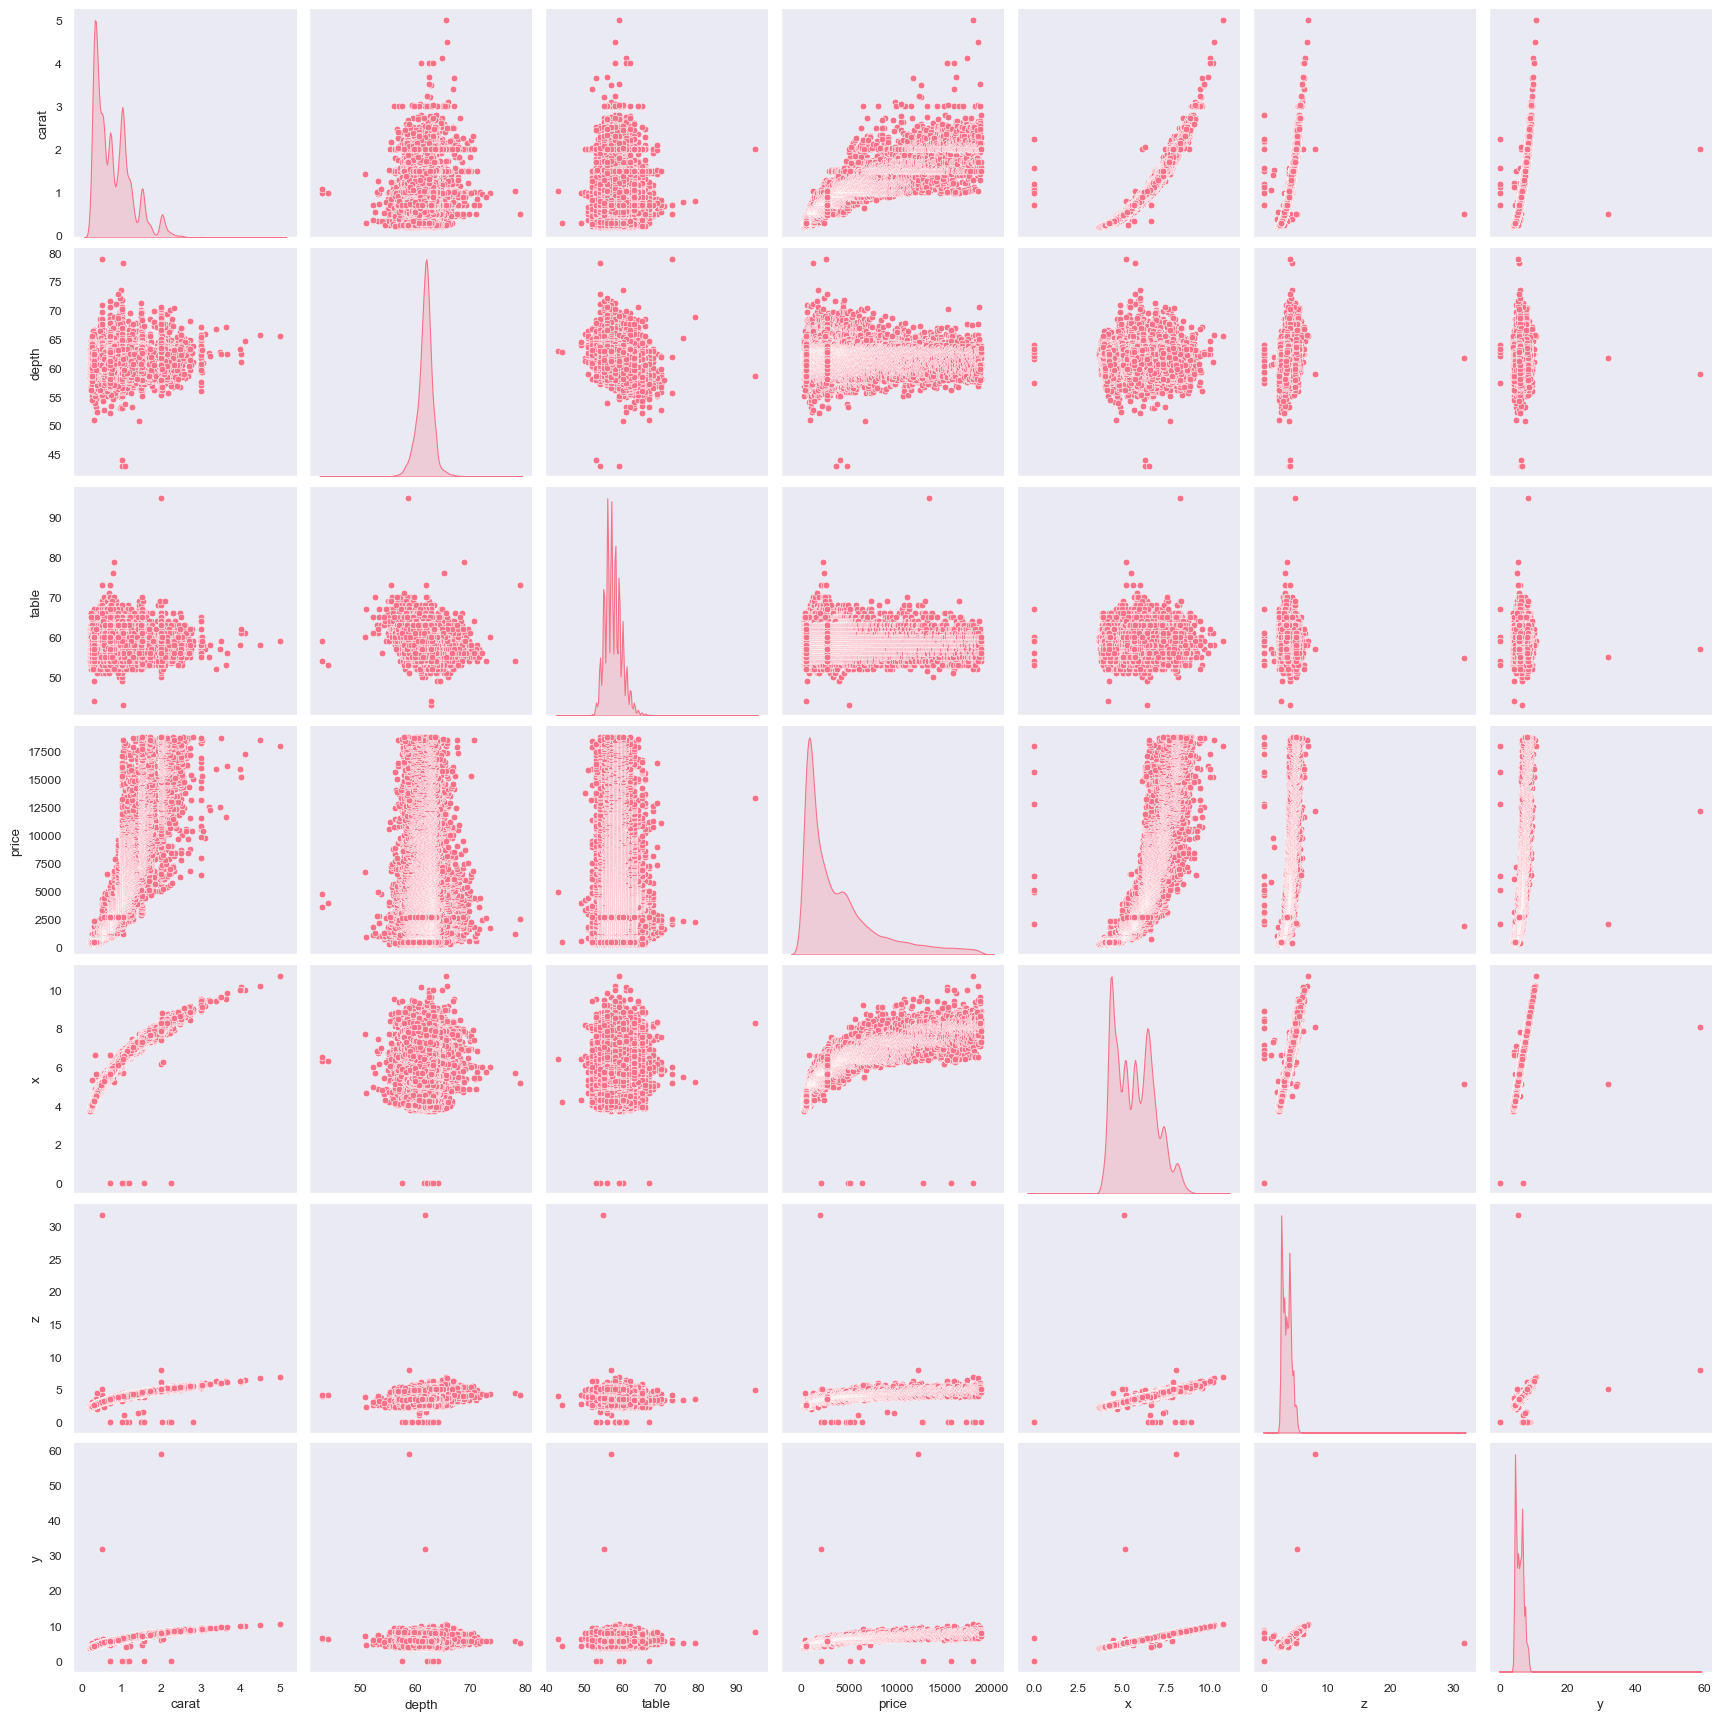

In [120]:
sns.pairplot(dataset[numerical_features], diag_kind='kde')
plt.show()

In [121]:
large_diamond = dataset['carat'].gt(dataset['carat'].quantile(0.75)).rename('large_diamond')

### **Cut - Best to Worst**
**Ideal -> Premium -> Very Good -> Good -> Fair**

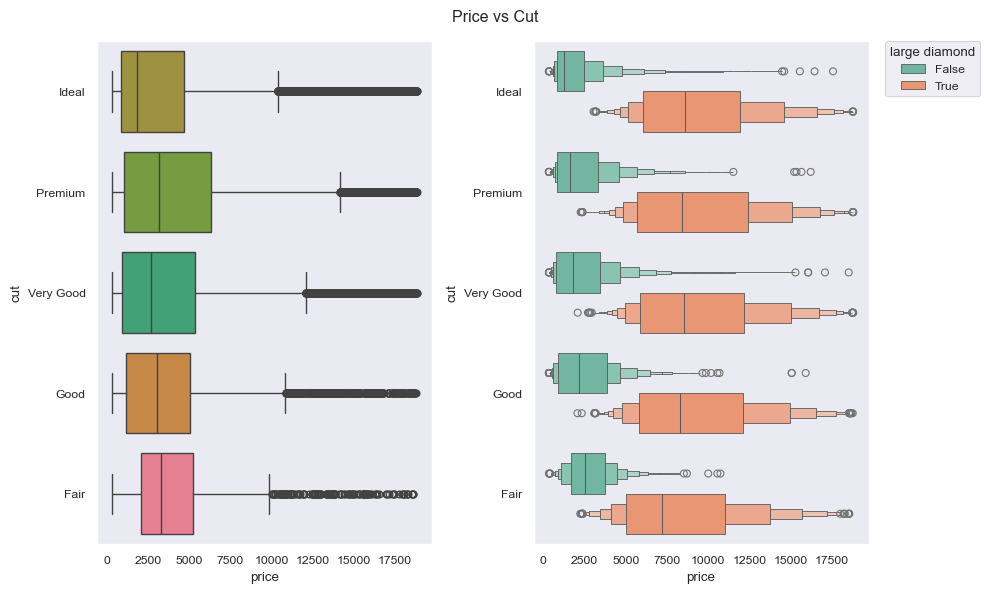

In [122]:
cut_order = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.boxplot(data = dataset, x = 'price', y = 'cut', order = cut_order, hue = 'cut')

plt.subplot(1,2,2)
sns.boxenplot(data=dataset, x='price', y='cut', order = cut_order, legend='auto', hue = large_diamond, palette = 'Set2')
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0., title = 'large diamond')

plt.suptitle('Price vs Cut')
plt.tight_layout()
plt.show()

**Key Observations**
*   Higher cut quality does not always mean a higher price
*   Larger diamonds with any cut grade are more expensive than smaller, higher-quality diamonds

### **Clarity - Best to Worst**
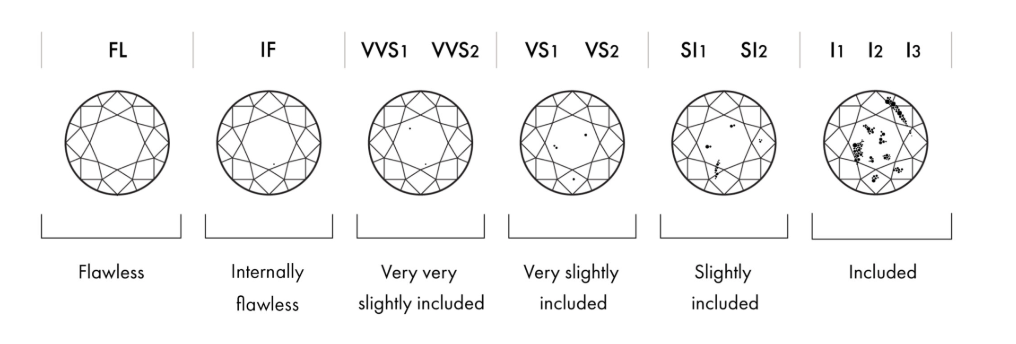

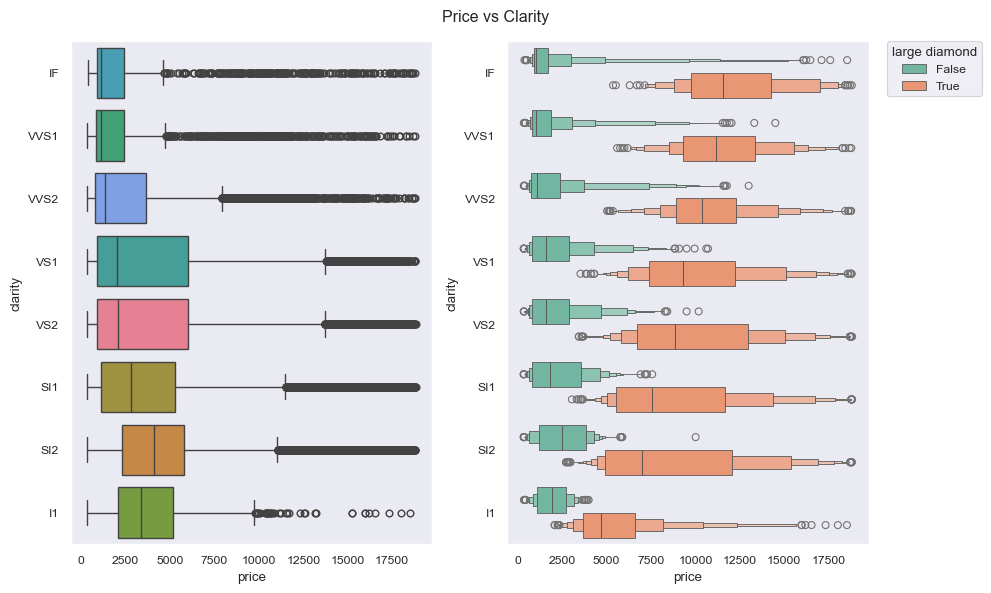

In [123]:
clarity_order = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.boxplot(data=dataset, x='price', y='clarity', order = clarity_order, hue = 'clarity')

plt.subplot(1,2,2)
sns.boxenplot(data=dataset, x='price', y='clarity', order = clarity_order, legend='auto', hue = large_diamond, palette = 'Set2')
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0., title = 'large diamond')

plt.suptitle('Price vs Clarity')
plt.tight_layout()
plt.show()

**Key Observations**
*   Clarity impacts price but is not the strongest factor
*   Large diamonds with lower clarity can still be more expensive than small, high-clarity diamonds

### **Color - Best to Worst**
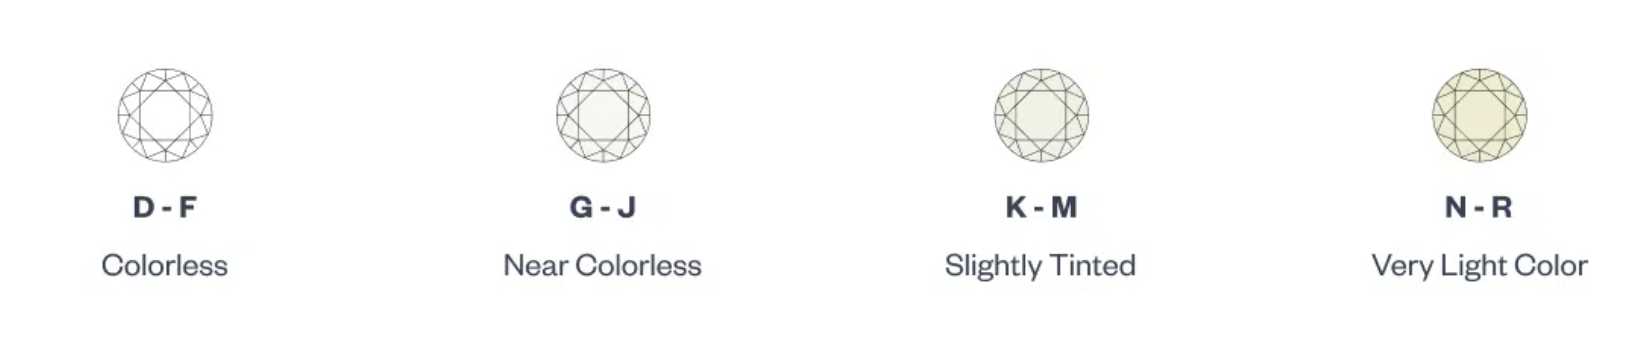

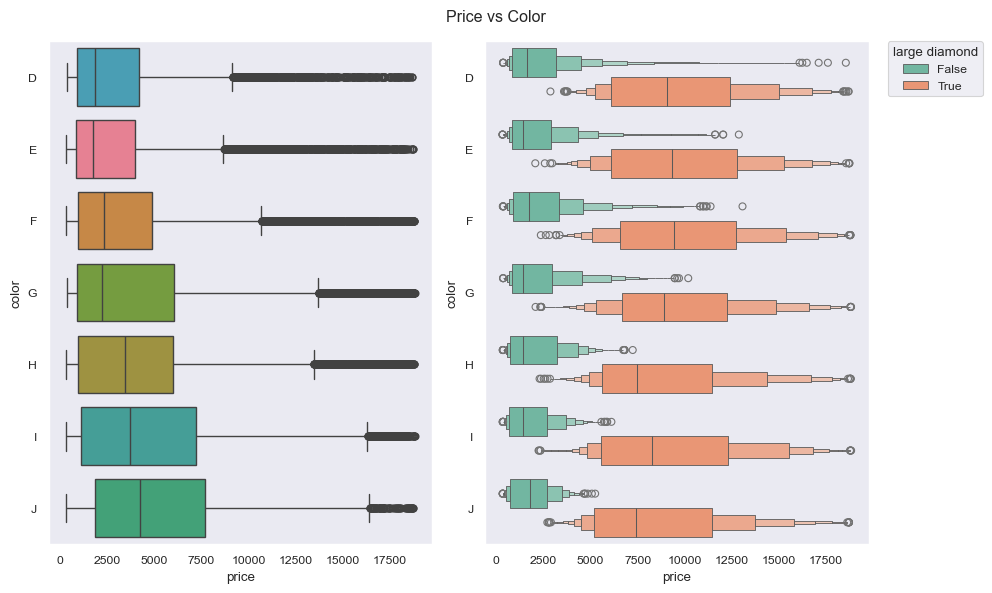

In [124]:
color_order = ['D', 'E', 'F', 'G', 'H', 'I', 'J']

plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.boxplot(data=dataset, x='price', y='color', order = color_order, hue = 'color')

plt.subplot(1,2,2)
sns.boxenplot(data=dataset, x='price', y='color', order = color_order, legend='auto', hue = large_diamond, palette = 'Set2')
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0., title = 'large diamond')

plt.suptitle('Price vs Color')
plt.tight_layout()
plt.show()

**Key Observations**
*   Color alone does not determine price
*   Large diamonds significantly drive up prices across all color grades.

### Visualization of Price against all numerical features wrt Categorical Features and OLS Trendline

In [125]:
y_variables = ['price']
x_variables = numerical_features.tolist()
x_variables.remove('price')
col_variables = categorical_features
scope_values = ['overall', 'trace']


In [126]:
from dash import Dash, html, dcc, Input, Output
import dash_bootstrap_components as dbc

import plotly.graph_objects as go
import plotly.express as px

app = Dash(__name__, external_stylesheets=[dbc.themes.CERULEAN])

app.layout = dbc.Container(
    [
        dbc.Row(
            [
                dbc.Col(
                    [
                        dcc.Markdown(
                            "#### Plotly Express line chart with trendlines and dropdown",
                            className="text-white",

                        )
                    ],  # style={"textalign": "center"},
                    width=8
                )
            ],
            className="bg-secondary rounded-3 mt-2",
            # style={"textalign": "center"},

            justify="center"

        ),
        dbc.Row(

            [

                dbc.Col([dbc.Label(
                    "Target variable:",
                    # className="bg-info bg-opacity-50 mt-2 p-2",
                    className="mt-2 p-2",
                    style={"width": "100%"},
                ),
                    dcc.Dropdown(y_variables,
                                 y_variables[0], id='y_val'),
                    dbc.Label(
                    "Explanatory variable:",
                    # className="bg-info bg-opacity-50 mt-2 p-2",
                    className="mt-2 p-2",
                    style={"width": "100%"},
                ),
                    dcc.Dropdown(x_variables,
                                 x_variables[0], id='x_val'),
                    dbc.Label(
                    "Distribution variable:",
                    # className="bg-info bg-opacity-50 mt-2 p-2",
                    className="mt-2 p-2",
                    style={"width": "100%"},
                ),
                    dcc.Dropdown(col_variables,
                                 col_variables[0], id='col_val'),
                    dbc.Label(
                    "Trendline Scope:",
                    # className="bg-info bg-opacity-50 mt-2 p-2",
                    className="mt-2 p-2",
                    style={"width": "100%"},
                ),
                    dcc.Dropdown(scope_values,
                                 scope_values[0], id='trendline_scope'),

            ], 
                width=4
        ),
                dbc.Col(
                    [

                        dcc.Graph(id='fig1')
                    ]
                )
            ],
            className="bg-secondary bg-opacity-25 rounded-3 p-2 mt-2",
        ),
    ]
)


@ app.callback(Output('fig1', 'figure'),
               [Input('y_val', 'value'),
                Input('x_val', 'value'),
                Input('col_val', 'value'),
                Input('trendline_scope', 'value')
                ])
def trends(y, x, col, scope):

    fig = px.scatter(dataset, x=x, y=y, color=col, trendline="ols",
                     trendline_scope=scope
                     )
    fig.update_layout(paper_bgcolor='rgba(0,0,0,0)',
                      plot_bgcolor='rgba(0,0,0,0)')
    return fig

app.run_server(debug=True, use_reloader=False, mode='inline')

[2025-03-18 13:23:24,837] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/opt/anaconda3/envs/SDSenv/lib/python3.12/site-packages/flask/app.py", line 880, in full_dispatch_request
    rv = self.dispatch_request()
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/SDSenv/lib/python3.12/site-packages/flask/app.py", line 865, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)  # type: ignore[no-any-return]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/SDSenv/lib/python3.12/site-packages/dash/dash.py", line 1376, in dispatch
    ctx.run(
  File "/opt/anaconda3/envs/SDSenv/lib/python3.12/site-packages/dash/_callback.py", line 507, in add_context
    raise err
  File "/opt/anaconda3/envs/SDSenv/lib/python3.12/site-packages/dash/_callback.py", line 496, in add_context
    output_value = _invoke_callback(func, *func_args, **func

### Ordinal Encoding

Since using Random Forest, XGBoost → Label Encoding is better. \
If using Linear Regression, SVM → One-Hot Encoding is better. \
However, since we have order in the categories, manually defining mapping to set correct order.

In [127]:
df = dataset.copy(deep=True)

In [128]:
#Using OrdinalEncoding to convert 
categories_order = [cut_order, color_order, clarity_order]

for feature, order in zip(categorical_features, categories_order):
    print(f"Feature: {feature}")
    print(f"Category Order: {order}")
    #print(f"Category Order: {order.reverse}")
    oe = OrdinalEncoder(categories = [order])
    dataset[feature + '_en'] = oe.fit_transform(dataset[[feature]])     

Feature: cut
Category Order: ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
Feature: color
Category Order: ['D', 'E', 'F', 'G', 'H', 'I', 'J']
Feature: clarity
Category Order: ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']


In [129]:
dataset

,cut,color,clarity,carat,depth,table,price,x,z,y,cut_en,color_en,clarity_en
0,Fair,E,VS2,0.22,65.1,61.0,337,3.87,2.49,3.78,4.0,1.0,4.0
1,Fair,E,SI2,0.86,55.1,69.0,2757,6.45,3.52,6.33,4.0,1.0,6.0
2,Fair,F,SI2,0.96,66.3,62.0,2759,6.27,4.07,5.95,4.0,2.0,6.0
3,Fair,F,VS2,0.70,64.5,57.0,2762,5.57,3.58,5.53,4.0,2.0,4.0
4,Fair,F,VS2,0.70,65.3,55.0,2762,5.63,3.66,5.58,4.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,Very Good,E,VS2,0.70,62.8,60.0,2755,5.59,3.53,5.65,2.0,1.0,4.0
53936,Very Good,D,VS1,0.70,63.1,59.0,2755,5.67,3.55,5.58,2.0,0.0,3.0
53937,Very Good,E,VS2,0.70,60.5,59.0,2757,5.71,3.47,5.76,2.0,1.0,4.0
53938,Very Good,E,VS2,0.70,61.2,59.0,2757,5.69,3.49,5.72,2.0,1.0,4.0


In [134]:
# Dropping original categorical columns as we have the encoded values now
dataset.drop(columns= ['cut', 'color', 'clarity'], inplace = True)

KeyError: "['cut', 'color', 'clarity'] not found in axis"

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(dataset.corr(), annot=True, cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True)
, fmt='.2f')
plt.title('Feature Correlation Heatmap')

**Key Observations**
*   Carat is the most important factor in determining diamond price
*   Physical size (x, y, z) has a strong influence on price
*   Cut, color, and clarity play a much smaller role in price variation
*   Depth and table have little to no impact on price

### Outliers

In [131]:
outliers = pd.DataFrame()

for feature in numerical_features:
    Q1 = dataset[feature].quantile(0.25)
    Q3 = dataset[feature].quantile(0.75)


    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    mask = (dataset[feature] < lower_bound) | (dataset[feature] > upper_bound)
    outliers = pd.concat([outliers, dataset[feature][mask]], axis = 1)

In [132]:
outliers.head()

,carat,depth,table,price,x,z,y
604,2.14,69.4,NaN,NaN,NaN,NaN,NaN
606,2.15,65.5,NaN,NaN,NaN,NaN,NaN
625,2.22,66.7,NaN,NaN,NaN,NaN,NaN
637,2.01,67.4,NaN,NaN,NaN,NaN,NaN
638,2.01,55.9,64.0,NaN,NaN,NaN,NaN


In [133]:
print("Percentage of outliers")
print("----------------------")
outliers.count() / len(dataset) * 100

Percentage of outliers
----------------------


carat    3.502039
depth    4.718205
table    1.121617
price    6.562848
x        0.059325
z        0.090842
y        0.053763
dtype: float64

**Outliers have been retained for now. \
Their removal will be considered based on model selection and performance evaluation.**